In [2]:
import numpy as np
import math
import random 
import numpy.linalg as la
import matplotlib.pyplot as plt

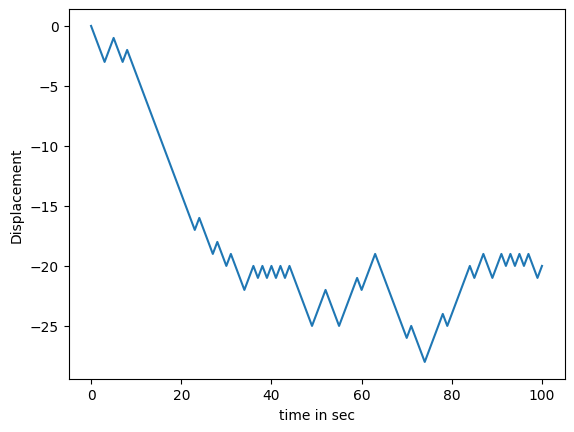

In [4]:
#Simulate the 1-D walk by using a random number generator
d=[-1,1]
def simulate_random_walk():
 t=[0]
 x=[0]
 while(t[-1]<100):
  i=random.choice(d)
  x.append(x[-1]+i)
  t.append(t[-1]+1)
 plt.plot(t,x)


simulate_random_walk()
plt.xlabel('time in sec')
plt.ylabel('Displacement')
plt.show()

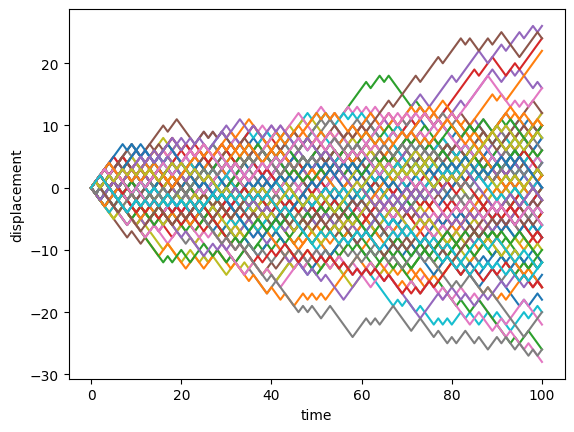

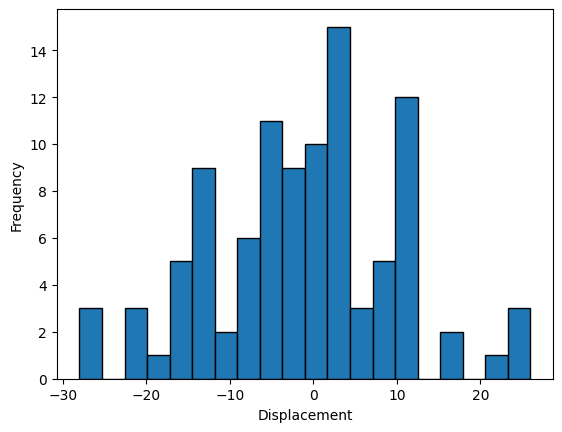

In [10]:
#Generate 100 different realizations of the random sequence of steps by using a different seed each time.
#and Graphically show the random walks we need to Calculate the displacement of the end point for each realization, 
#and show graphically how these are distributed using a histogram for 1-D. 

def simulate(j):
 t=[0]
 x=[0]
 while(t[-1]<100):
  i=random.choice(d)
  x.append(x[-1]+i)
  t.append(t[-1]+1)
 plt.plot(t,x,label=f"{j}")
 return x[-1]

dis=np.full(100,0)

for i in range(100):
    random.seed(i)
    dis[i]=(simulate(i))
    
#plt.legend()
plt.xlabel('time')
plt.ylabel('displacement')
plt.show() 
plt.xlabel('Displacement')
plt.ylabel('Frequency')
plt.hist(dis, bins=20, edgecolor='black', alpha=1, label='dis')
plt.show()


    

    
    


Mean displacement: 0.009719522354901417 
RMS displacement: 21.47248842020518


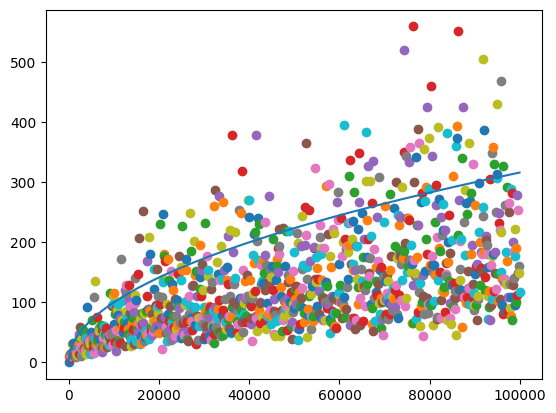

In [28]:
#Calculation for the mean and the root mean square (RMS) displacement of the endpoint
# after 1 hour and by increasing the time (number of steps)  checking  
#that the mean displacement tends to 0 and the RMS displacement scales as the square-root of the time. 

t_uni=[]
mean_dis=[]
j=0
while(j<100000):
 t=0
 x=0
 root_mean_square=0
 while(t<=j):
  i=random.choice(d)
  x=x+i
  t=t+1
  root_mean_square += x*x
 root_mean_square /= t
 root_mean_square= math.sqrt(root_mean_square)
 mean_dis.append(x/t)
 t_uni.append(j)
 #print(f"j {j} root mean squre {root_mean_square}")
 plt.plot(j,root_mean_square,'o',label='root_mean square ')
 if(j==3600):
  print(f"Mean displacement: {mean_dis[-1]} ")
  print(f"RMS displacement: {root_mean_square}")
 #plt.plot(j,math.sqrt(j),'o',label='sqrt time')
 j = j+100
plt.plot(t_uni,np.sqrt(t_uni))

plt.show()


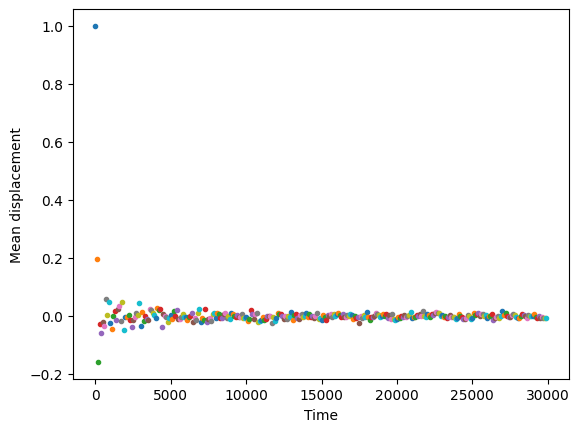

In [25]:
#For large time the mean displacement is zero for 1-D.
for i in range(300):
 plt.plot(t_uni[i],mean_dis[i],'.')

plt.ylabel("Mean displacement")
plt.xlabel("Time")
plt.show()


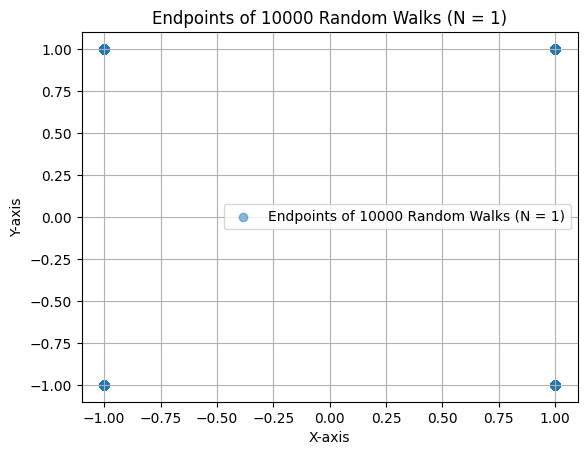

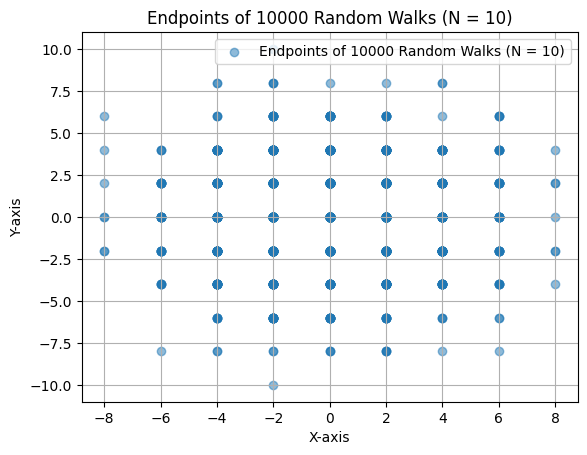

In [2]:
# emergent symmtry 
import numpy as np
import matplotlib.pyplot as plt
def random_walk_endpoints(W, N, d):
    endpoints = np.zeros((W, d))

    for i in range(W):
        steps = np.random.choice([-1, 1], size=(N, d))
        endpoints[i] = np.sum(steps, axis=0)

    return endpoints

def plot_scatter(endpoints, title):
    plt.scatter(endpoints[:, 0], endpoints[:, 1], alpha=0.5, marker='o', label=title)
    plt.title(title)
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.legend()
    plt.grid(True)
    plt.show()


W = 1000
d = 2

endpoints_N1 = random_walk_endpoints(W, 1, d)

endpoints_N10 = random_walk_endpoints(W, 10, d)


plot_scatter(endpoints_N1, 'Endpoints of 10000 Random Walks (N = 1)')
plot_scatter(endpoints_N10, 'Endpoints of 10000 Random Walks (N = 10)')
